In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

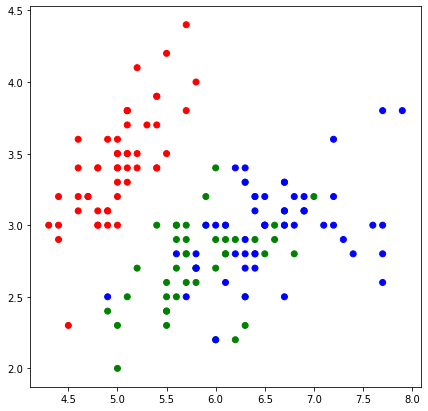

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [7]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [18]:
def knn_1(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        idx = 0   
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            idx += 1
            classes[d[1]] += d[0]*(1/idx)

        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [32]:
def knn_2(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            w = q**d[1]
            classes[d[1]] += d[0]*w

        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [21]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [56]:
def get_graph(X_train, y_train, k, w, q = None):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if w == 'i':
        Z = knn_1(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    elif w == 'distance':
        Z = knn_2(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [50]:
k = 5

y_pred = knn_1(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.767


In [51]:
k = 10

y_pred = knn_1(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


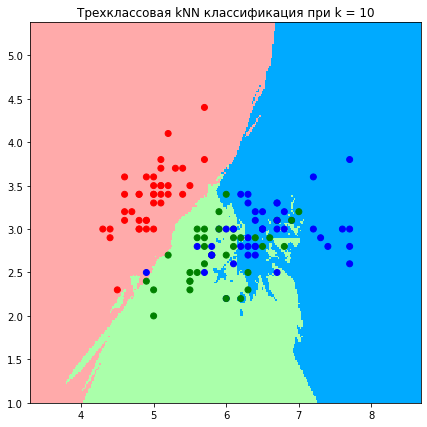

In [52]:
get_graph(X_train, y_train, k, w = 'i')

In [53]:
k = 5
q = 0.7
y_pred = knn_2(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


In [58]:
k = 10
q = 0.7
y_pred = knn_2(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.900


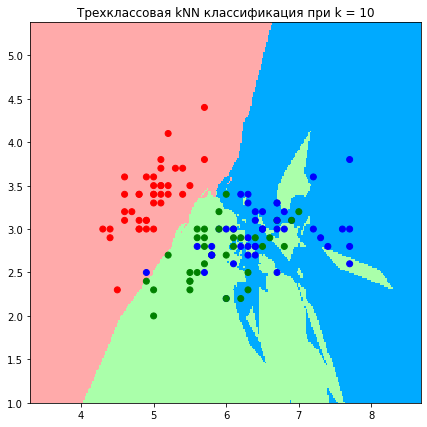

In [59]:
get_graph(X_train, y_train, k, w = 'distance', q = 0.7)

Добавление весов для соседей в зависимости от расстояния до соседа значительно повысило качество алгоритма. 

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

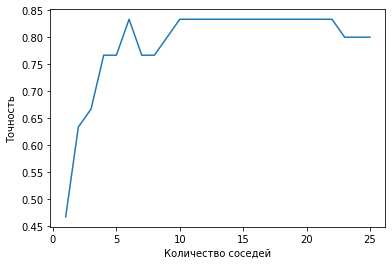

In [64]:
k = 25
acc_list = []
for k in range(1,k+1):
    y_pred = knn_1(X_train, y_train, X_test, k)
    acc_list.append(accuracy(y_pred, y_test)) 
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.plot(list(range(1,k+1)), acc_list)
plt.show()    

Для модели с добавлением весов для соседей в зависимости от номера соседа можно принять оптимальным - 10 соседей. 

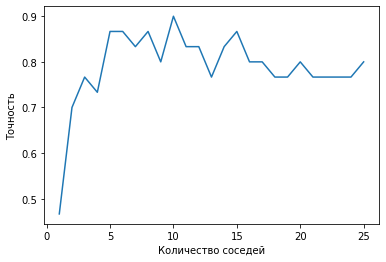

In [65]:
k = 25
acc_list = []
for k in range(1,k+1):
    y_pred = knn_2(X_train, y_train, X_test, k, q = 0.7)
    acc_list.append(accuracy(y_pred, y_test)) 
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.plot(list(range(1,k+1)), acc_list)
plt.show()  

Для модели с добавлением весов для соседей в зависимости от расстояния до соседа можно принять оптимальным также - 10 соседей. 